# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

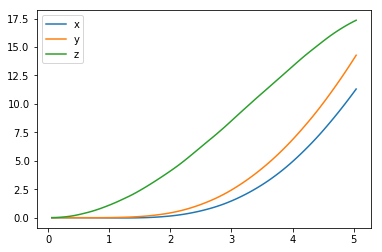

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

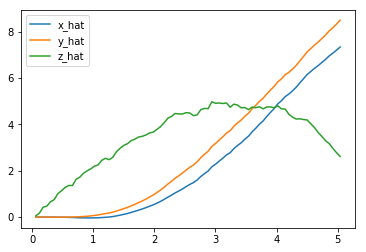

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

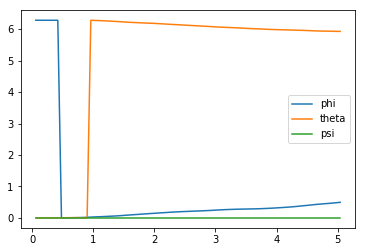

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

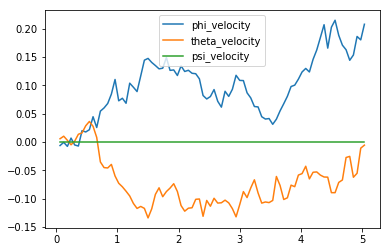

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

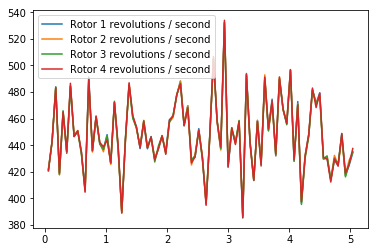

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 11.30771095  14.27813724  17.35299043   0.4950068    5.92909003   0.        ]
[ 7.34192408  8.49834904  2.61890634]
[ 0.2079161  -0.00543731  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = 300.000 (best = 300.000), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
import sys
from collections import deque
import pandas as pd
import csv
import numpy as np
from agents.agent import DDPG
from task import Task

num_episodes = 6000
target_pos = np.array([1., 1., 20.])
initial_pos = np.array([0., 0., 2., 0., 0., 0.])

# add a debug flag
debug = False

task = Task(init_pose=initial_pos, target_pos=target_pos, debug=debug)
agent = DDPG(task) 

# initialize average rewards
avg_rewards = deque(maxlen=num_episodes)
avg_reward = 0

# initialize best average reward
best_avg_reward = -np.inf

# initialize monitor for most recent rewards
samp_rewards = deque(maxlen=100)

# initialize variables for tracking average copter z position.
avg_z_pos = 0
avg_z_positions = deque(maxlen=num_episodes)
samp_positions = deque(maxlen=100)

# initialize variables for tracking average copter velocity.
avg_velocity = 0
avg_velocities = deque(maxlen=num_episodes)
samp_velocities = deque(maxlen=100)

# initialise variables to track the number of times the target location was reached each episode.
number_target_hits = 0
target_reached_total = deque(maxlen=num_episodes)
target_reached = deque(maxlen=10)
target_streak = 0
best_target_streak = 0

file_output = 'data.txt'                         # file name for saved results
labels = ['time', 'x', 'y', 'z'] # extend the list as needed...
results = {x : [] for x in labels}

# initialise a boolean to indicate if the simulation should be finished prematurely.
early_finish = False

with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode

        if (early_finish):
            break
        
        # initialize/reset the sampled reward for this episode. 
        samp_reward = 0
        # Initialise/reset the episodes list of timmestep z axis positions.
        episode_z_avg = np.zeros(1)
        # Initialise/reset the episodes list of timestep velocities.
        episode_velocity_avg = np.empty((1, 3))
        
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state    

            # update the sampled reward (Cumulative reward for this episode)
            samp_reward += reward
            
            # Record the z position at this timestep.
            episode_z_avg = np.append(episode_z_avg, [task.sim.pose[2]])
            
            # Record the velocity at this timestep.
            episode_velocity_avg = np.append(episode_velocity_avg, [task.sim.v], axis=0)
                
            # Count the number of times the target was reached over the last 10 episodes.
            number_target_hits = target_reached.count(1)
            
            # Stop training if the at least 8 of the last 10 episodes hit the target.
            if (number_target_hits > 7):
                early_finish = True
                
            # Record the simulation data for the last episode.
            # Todo: Lets do that last 5 episodes?
            if (i_episode == num_episodes or early_finish):
                to_write = [task.sim.time] + list(task.sim.pose)
                for ii in range(len(labels)):
                    results[labels[ii]].append(to_write[ii])
                writer.writerow(to_write)
                    
            if done:
                
                if (debug):
                    print('EPISODE REWARD:', reward);
                    print('\n')
                    
                if (reward == 300):
                    # Exactly 300 Reward is given when the target is reached.
                    # Record that 1 out of the last 10 episodes reached the target.
                    target_reached.append(1)
                    # Record how many times in a row the target was reached.
                    target_streak = target_streak + 1
                    # Note if there is a new record for the number of times in a row an episode reached
                    # the target.
                    if (target_streak > best_target_streak):
                        best_target_streak = target_streak
                else:
                    # If the target was not reached this episode.
                    # Record that 1 out of the last 10 episodes did NOT reach the target.
                    target_reached.append(0)
                    # Reset the target streak.
                    target_streak = 0
                
                # save final cumulative sampled reward for this episode to our list of sample rewards (100 total)
                samp_rewards.append(samp_reward)
                
                # save the average episode Z axis copter positions over the timesteps in this episode.
                samp_positions.append(np.mean(episode_z_avg))
                
                # save the average episode copter velocity over the timesteps in this episode.
                samp_velocities.append(np.mean(episode_velocity_avg, axis=0))
                #print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                #    i_episode, agent.score, agent.best_score, agent.noise), end="")  # [debug]
                break

        if (i_episode >= 100):
            
            # Record the number of target hits for the last 10 episodes as of the current episode.
            target_reached_total.append(number_target_hits)
            
            # get average reward from last 100 episodes
            avg_reward = np.mean(samp_rewards)
            
            # get average reward from last 100 episodes
            avg_z_pos = np.mean(samp_positions)
        
            # This is the average of the x,y,z axis velocities. So if [1,2,3] average is 2. "General velocity
            # disregarding direction"
            avg_velocity = np.mean(np.mean(samp_velocities, axis=0))
        
            # Update the record of average rewards.
            avg_rewards.append(avg_reward)
            
            #Update the record of average z positions.
            avg_z_positions.append(avg_z_pos)
            avg_velocities.append(avg_velocity)
            
            # update best average reward
            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward

        sys.stdout.flush()
        
        print("\rEp {}/{} || Avg ep reward {:f} | Best Avg Reward {:f} | Avg ep Z {:f} | Last 10 ep Target Hits {:f}".format(
           i_episode, num_episodes, avg_reward, best_avg_reward, avg_z_pos, number_target_hits), end="")
    

Using TensorFlow backend.


Ep 2562/6000 || Avg ep reward 237.611315 | Best Avg Reward 237.611315 | Avg ep Z 45.506447 | Last 10 ep Target Hits 8.000000

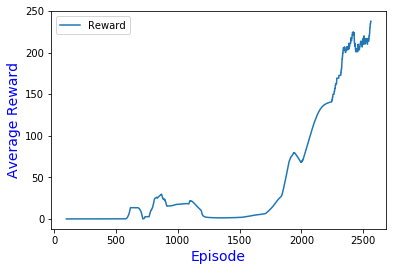

In [2]:
# Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([x + 99 for x in range(i_episode-1  -99)], avg_rewards, label='Reward')
plt.legend()
plt.xlabel('Episode', fontsize=14, color='blue')
plt.ylabel('Average Reward', fontsize=14, color='blue')
_ = plt.ylim()


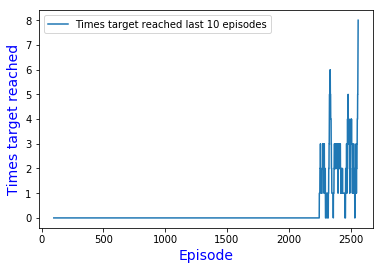

In [3]:
# Plot the number of times the target location was reached by the copter out of the last 10 episodes.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([x + 99 for x in range(i_episode-1 -99)], target_reached_total, label='Times target reached last 10 episodes')
plt.legend()
plt.xlabel('Episode', fontsize=14, color='blue')
plt.ylabel('Times target reached', fontsize=14, color='blue')
_ = plt.ylim()

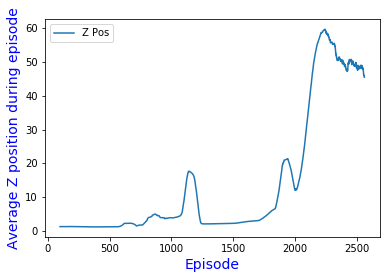

In [4]:
# Plot the current average Z axis position of the copter at each episode.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([x + 99 for x in range(i_episode-1 -99)], avg_z_positions, label='Z Pos')
plt.legend()
plt.xlabel('Episode', fontsize=14, color='blue')
plt.ylabel('Average Z position during episode', fontsize=14, color='blue')
_ = plt.ylim()


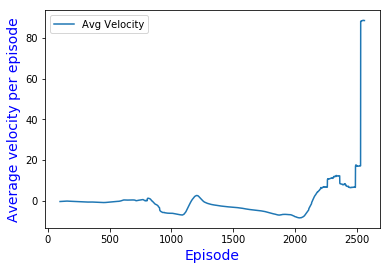

In [5]:
# Plot the current average velocity of the copter at each episode.
plt.plot([x + 99 for x in range(i_episode-1 -99)], avg_velocities, label='Avg Velocity')
plt.legend()
plt.xlabel('Episode', fontsize=14, color='blue')
#plt.ylabel('Average Z position at episode end', fontsize=14, color='blue')
plt.ylabel('Average velocity per episode', fontsize=14, color='blue')
_ = plt.ylim()

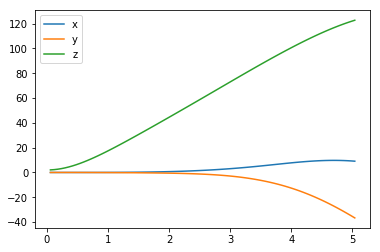

In [6]:
# Plot the position of the copter during the course of the last episode.
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

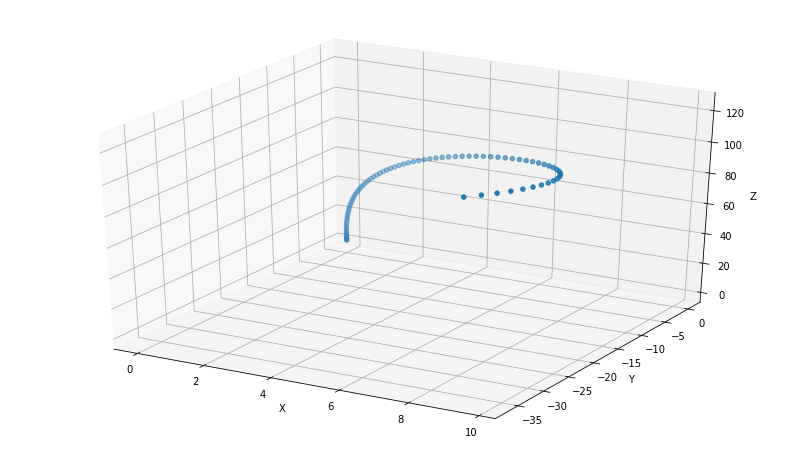

In [7]:
# Plot the position of the copter during the course of the last episode in 3D.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(results['x'], results['y'], results['z'])

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

The task I specified was quite simple. Train the Quadcopter to fly to a specified point in space. I had grand plans to combine this task with some additional movements, perhaps hovering in place and then landing again, but I quickly realised the extreme difficulty of designing a reward function for the initial task alone.

The design of the reward function took several week's and almost broke my confidence in my own ability to learn new skills, let alone the actual quadcopter.

My initial approach to the task was simple, I would initially attempt to train the copter to reach the goal target Z axis position only, leaving the X and Y axis positions to move where they will, worrying about their positions in later versions of the reward function.

From here, I tried a wide variety of approaches, including, but not limited to:

- Moving to a strictly sparse reward function. Rewards would only be given to the agent upon reaching the final goal. This resulted in an attempt to then create a "zone" around the target location that the copter could reach, e.g, within a distance of 5 units on all axis, which would result in improving rewards the closer the copter got to the target. But outside that zone, no rewards would be given and so I hoped that noise would ensure that the agent eventually stumbled into the reward range during training.
- Attempted to grant rewards to the agent for staying within particular velocity range.
- Attempted to grant rewards to the agent for for reaching a particular height and penalties for flying to far above that height.
- Penalties for flying in the wrong direction on any axis.
- Applying penalties or rewards to only the axis that is furthest from the target.
- Applying a large penalty when the copter crashes.


In the end, I finally managed to get a reward function that seemed to match the target goal well, increasing in reward the better the copter performed in it's goal of reaching the target area. The key features of the final reward function were.


- A small reward based on the euclidean distance between the copter and the target location. The reward scales to heavily penalise long distances.

- A very large reward when the agent reaches a range below 1 unit on every axis of the target location. This would then stop the episode early, marking a successful episode.

- A small reward for each timestep that the copter remains in the air (hasn't crashed).

- Used a Relu activation function to scale the regular (non successful episode) reward to a value bewteen -1 and 1.


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?

- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

### Answer:

I only attempted to use the DDPG algorithm. I intended to also attempt a D4PG implementation of my own, but given the immense difficulty I experienced trying to get the original DDPG algorithm to work, this unfortunately fell far outside my time (and mental) constraints.

**Hyper parameters:**

In [ ]:
# Agent Hyperparameters
self.exploration_mu = 0
self.exploration_theta = 0.15
self.exploration_sigma = 0.2

self.buffer_size = 100000
self.batch_size = 128

self.gamma = 0.99
self.tau = 0.01

# Task Hyperparameters.
self.action_low = 0
self.action_high = 900

After an extensive "manual" grid search of many different hyperparameter value combinations, I eventually found that the defaults provided by the DDPG starter code were actually very well suited for reasonably good agent learning results.

In the end, the only adjustment that actually saw improvement for my particular agent goal was an increase in the Replay Memory batch size, which saw modest improvements to the convergence time and reward scores.

I had success during certain experiments with modifying the action_high value, with values higher than the default often producing faster convergence. However ultimately the higher reward scores remained elusive when the action space was increased.

Increasing the noise hyperparameters also met with varying levels of success depending on the values of the other hyperparameters, however somehow I ended up back at the original values for the final configuration.

Modifications to the tau hyperparameter of the Agent were probably the most interesting. Higher values of tau than the default were excellent for producing faster convergence, however once again the higher reward scores could not be obtained with these values. Conversely, really low tau values sometimes resulted in excellent rewards, however the training time was unreasonably slow. In the end, the default value turned out to be the best.

**Neural Network Architecture**

Learning Rate (For both Actor and Critic networks): 0.000001

_Actor:_

In [ ]:
net = layers.Dense(units=32, activation='relu')(states)
net = layers.Dense(units=64, activation='relu')(net)
net = layers.Dense(units=32, activation='relu')(net)

_Critic:_

In [ ]:
net_states = layers.Dense(units=32, activation='relu')(states)
net_states = layers.Dense(units=64, activation='relu')(net_states)
net_states = layers.Dropout(0.1)(net_states)
        
net_actions = layers.Dense(units=32, activation='relu')(actions)
net_actions = layers.Dense(units=64, activation='relu')(net_actions)
net_states = layers.Dropout(0.1)(net_states)

As with the Agent and Task hyperparameters, I also experimented with many different neural network architectures for both the Actor and the Critic. However, once again the final result ended up fairly similar to the DDPG starter code! 

The only meaningful addition was a little bit of dropout added to each of the Critic networks, which was critical to achieving the higher rewards during training.

Other arrangements, more complex layers, the addition of extra layers, regulisation and different combinations and amounts of dropout layers seemed to have little effect on the best average reward result.

The absolute key change that finally resulted in reasonable (if slow and inconsistent to converge) results was dramatically reducing the learning rate for both the Actor and the Critic

---------

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The agent generally had a difficult time learning the task, requiring many episodes before the reward started to seriously and consistently increase. In the graph above, there are a few early (failed) increases in reward, however these were not typical and often during training there would be no reward at all until the eventual AHA moment which would usually occur around 1500 episodes. At this point in time the reward would usually steeply increase.

The final performance of the agent was measured by the number of times the target position was reached over the last 10 episodes. I set 8/10 successful (target reached) episodes as the indication of a successfully trained agent. At this point the reward is usually around 250, but has at times been as high as 350, in which case the performance is 10/10 successful episodes. The greater performance was obtained only very rarely however.

The current learning process is unfortunately far from perfect. In many instances the average rewards did not increase past 100 or so. In other instances they didn't increase at all. With certain architectures and hyperparameters the learning process could converge much quicker and much more consistently, however would not reach the rewards required for adequate performance despite my best efforst and frustrations. The final solution was a tradeoff between consistency, learning speed and performance.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

I feel like this project was one of the most mind boggling challenging tasks I've ever attempted. Several times I almost dropped out of this course as a result, but eventually stuck with it.

Absolutely the most difficult task was designing the reward function, followed closely by hyperparameter tuning. 

It was also quite difficult to work out which values to print and visualise during training and reward function design in order to get a sense of the current performance of the agent and algorithm.

I definitely have an appreciation for just how difficult and complex reinforcment learning problems can be to solve and a completely new admiration and awe of the people engineering self driving cars and other real world implementations.

**RESOURCES**

- https://github.com/WittmannF/quadcopter-best-practices
- https://medium.com/@BonsaiAI/deep-reinforcement-learning-models-tips-tricks-for-writing-reward-functions-a84fe525e8e0
- https://stats.stackexchange.com/questions/189067/how-to-make-a-reward-function-in-reinforcement-learning
- https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy